In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Génération des données
np.random.seed(42)  # Pour la reproductibilité
n_points = 100
x = np.linspace(0, 100, n_points)  # Dépenses publicitaires
y = 50 + 2 * x + 10 * np.sin(x / 5) + np.random.normal(0, 10, n_points)  # Ventes avec variation sinus

# Création du DataFrame
df = pd.DataFrame({'Dépenses_publicitaires': x, 'Ventes': y})

                            OLS Regression Results                            
Dep. Variable:                 Ventes   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2428.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           5.84e-71
Time:                        20:08:59   Log-Likelihood:                -386.90
No. Observations:                 100   AIC:                             777.8
Df Residuals:                      98   BIC:                             783.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     50

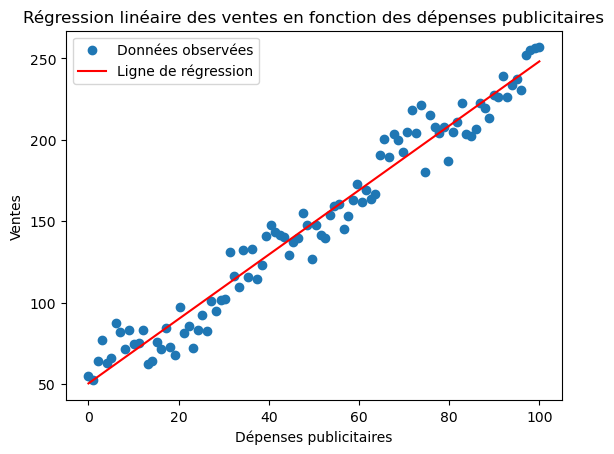

In [2]:
import statsmodels.api as sm

# Variables dépendante (Y) et indépendante (X)
X = df['Dépenses_publicitaires']  # Variable indépendante
y = df['Ventes']                   # Variable dépendante

# Ajout d'une constante à X pour le terme d'interception
X = sm.add_constant(X)

# Création du modèle de régression linéaire
model = sm.OLS(y, X)

# Ajustement du modèle aux données
results = model.fit()

# Afficher les résultats de la régression
print(results.summary())

plt.scatter(df['Dépenses_publicitaires'], df['Ventes'], label='Données observées')
plt.plot(df['Dépenses_publicitaires'], results.fittedvalues, color='red', label='Ligne de régression')
plt.xlabel('Dépenses publicitaires')
plt.ylabel('Ventes')
plt.title('Régression linéaire des ventes en fonction des dépenses publicitaires')
plt.legend()
plt.show()

   Home   price  sqft_living  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300         1790         2          2       2    No         East
1     2  114200         2030         4          2       3    No         East
2     3  114800         1740         3          2       1    No         East
3     4   94700         1980         3          2       3    No         East
4     5  119800         2130         3          3       3    No         East
               price  sqft_living
count     128.000000   128.000000
mean   130427.343750  2000.937500
std     26868.770371   211.572431
min     69100.000000  1450.000000
25%    111325.000000  1880.000000
50%    125950.000000  2000.000000
75%    148250.000000  2140.000000
max    211200.000000  2590.000000
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0

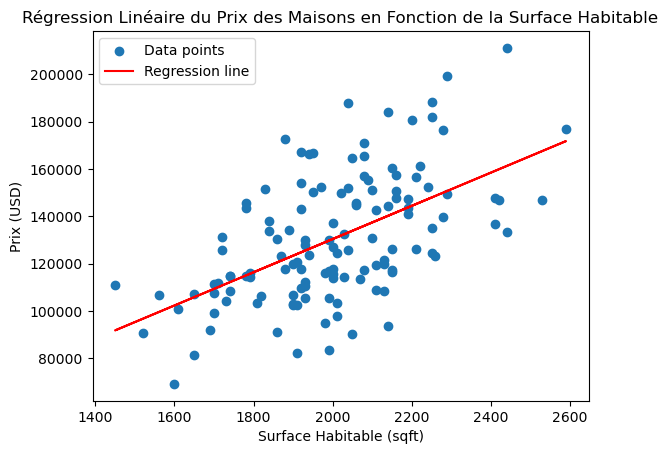

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Charger les données "house_prices"


url = '../Data/house_prices.csv'

data = pd.read_csv(url)

# Exploration des données
print(data.head())
print(data[["price", "sqft_living"]].describe())

# Préparation des données pour la régression
X = data["sqft_living"]
y = data["price"]
X = sm.add_constant(X)  # Ajout d'une constante pour l'ordonnée à l'origine

# Création et ajustement du modèle de régression linéaire
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Affichage des résultats de la régression
print(model.summary())

# Visualisation des résultats
plt.scatter(data["sqft_living"], data["price"], label="Data points")
plt.plot(data["sqft_living"], predictions, color='red', label="Regression line")
plt.xlabel("Surface Habitable (sqft)")
plt.ylabel("Prix (USD)")
plt.title("Régression Linéaire du Prix des Maisons en Fonction de la Surface Habitable")
plt.legend()
plt.show()